# **Predicting New York City Taxi Gratuities**


## Overview

`Automatidata`, a data consulting firm, is collaborating with the `New York City Taxi and Limousine Commission` (TLC) to use their extensive dataset to improve service quality and efficiency in the taxi and limousine industry. The TLC is responsible for the regulation and licensing of taxi cabs and for-hire vehicles in New York City.

The goals in this project are to `analyze` the TLC data, build a `regression model` that can predict the duration of taxi and limousine rides and finally build a `classification model` to determine if a customer will **not** leave a tip.


New York City Taxi and Limousine Commission (TLC) wants to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips, and the ability to filter out people who don't tip would help increase driver revenue. 

The `PACE` framework has been used to structure and complete this project.
- Plan
- Analyze
- Construct
- Execute

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.

----

![](images/pace_plan.png)

New York City TLC has given the Automatidata team access to their data. To get clear insights, New York TLC's data must be analyzed, key variables identified, and the dataset ensured it is ready for analysis.

- Familiarize with the TLC dataset
- Investigate and underastand the data
- Prepare the data for analysis


### Familiarize with the TLC dataset  🗒
The dataset used in this project has `22,699` rows and `17` columns. Here are the names and descriptions of the variables.
Variable  |Description |
-----|-----| 
VendorID|A code indicating the TPEP provider that provided the record|
tpep_pickup_datetime|The date and time when the meter was engaged|
tpep_dropoff_datetime|The date and time when the meter was disengaged|
passenger_count|The number of passengers in the vehicle|
trip_distance|The elapsed trip distance in miles reported by the taximeter|
RatecodeID|The final rate code in effect at the end of the trip|
store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before sending to the vendor|
PULocationID|Pickup location ID
DOLocationID|Dropoff location ID
payment_type|A numeric code signifying how the passenger paid for the trip|
fare_amount|The time-and-distance fare calculated by the meter|
extra|Miscellaneous extras and surcharges|
mta_tax|USD. 0.50 MTA tax that is automatically triggered based on the metered rate in use|
tip_amount|This field is automatically populated for credit card tips. Cash tips are not included|
tolls_amount|Total amount of all tolls paid in trip|
improvement_surcharge|USD. 0.30 improvement surcharge assessed trips at the flag drop|
total_amount|The total amount charged to passengers. Does not include cash tips|



### Import Libraries

In [1]:
# Import Libraries

# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for datetime 
import datetime as dt

# to displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for numerous statistical functions
from scipy import stats

# packages for machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, roc_auc_score, roc_curve,\
accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

# to save our models once we fit them.
import pickle

### Load dataset

In [2]:
df = pd.read_csv('data/Yellow_Taxi_Trip_Data_2017.csv')
print('done')

done


### View and inspect summary information.

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.shape

(22699, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There are `22699` entries and `18` columns with `no null` values. Both numeric and non-numeric Dtypes are present.

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


When it comes to trip distance, the majority of rides fall within the 1-3 mile range, with a few `outliers` extending beyond 33 miles. For fare amount, there `questionable negative values` and the maximum fare amount is significantly higher, reaching $1000, which is `well above the 25-75 percent` range of fare values.

### Investigate and underastand the data 🗒

Sort and interpret the data table for there variables: `trip_distance` and `total_amount`.

In [7]:
# sort the data by trip distance from maximum to minimum value
df.sort_values(['trip_distance'], ascending=False).head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


The values align with the earlier data discovery, where the longest rides are apprximately `33 miles`.

Check and see the values distribution of `total_amount`

In [8]:
# Sort the data by total amount and print the top 20 values
df_sort_amount = df.sort_values(['total_amount'], ascending=False)[['total_amount', 'trip_distance']]
df_sort_amount.head(20)

,total_amount,trip_distance
8476,1200.29,2.60
20312,450.30,0.00
13861,258.21,33.92
12511,233.74,0.00
15474,211.80,0.00
6064,179.06,32.72
16379,157.06,25.50
3582,152.30,7.30
11269,151.82,0.00
9280,150.30,33.96


The first two values are significantly `higher` than the others and the most expensive rides are not necessarily the longest ones.

In [9]:
df_sort_amount.tail(20)

,total_amount,trip_distance
14283,0.31,0.00
19067,0.30,0.10
10506,0.00,0.00
5722,0.00,0.00
4402,0.00,7.06
22566,0.00,0.00
1646,-3.30,0.04
18565,-3.80,0.10
314,-3.80,0.12
5758,-3.80,0.02


There are 13 negative values in the total_amount column

`VendorID` Codes indicating the TPEP provider that provided the record and are of 2 types:
1. Creative Mobile Technologies, LLC
2. VeriFone Inc.

In [10]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [11]:
# What is the mean total amount for each vendor?
df.groupby(['VendorID']).mean(numeric_only = True)[['total_amount']].reset_index()

,VendorID,total_amount
0,1,16.298119
1,2,16.320382


`Payment_type` has numeric codes signifying how the passenger paid for the trip.
1. Credit card
2. Cash
3. No charge
4. Dispute

In [12]:
# How many of each payment type are represented in the data?
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

`Tip amount` is automatically populated for credit card tips. Cash tips are `not included`.

In [13]:
# What is the average tip for trips paid for with credit card?
avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# What is the average tip for trips paid for with cash?
avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965280054
Avg. cash tip: 0.0


Find the average tip amount for each passenger count.

In [14]:
# Filter the data for credit card payments only
credit_card = df[df['payment_type']==1]

# Filter the data for passenger count only
credit_card['passenger_count'].value_counts()

1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: passenger_count, dtype: int64

In [15]:
# Calculate the average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).mean(numeric_only = True)[['tip_amount']].reset_index()

,passenger_count,tip_amount
0,0,2.610370
1,1,2.714681
2,2,2.829949
3,3,2.726800
4,4,2.607753
5,5,2.762645
6,6,2.643326


After looking at the dataset, the two variables that are most likely to help build a predictive model are `total_amount` and `trip_distance`. Those two variables are most likely to be helfpul because those variables show a picture of a taxi cab ride

### Prepare the data for analysis 🗒

Convert the date columns to datetime 

In [16]:
# Convert `tpep_dropoff_datetime` to datetime format
df["drop_off_converted"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")

# Convert `tpep_pickup_datetime` to datetime format
df["pick_up_converted"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

Drop `Unnamed: 0` column, which contains IDs for each entry in the dataset

In [17]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

Remove those trips with costs associated, but with trip distance = **0.**

In [18]:
df_2 = df['trip_distance'].loc[~(df==0).all(axis=1)]
df_2.shape


(22699,)

----

![PACE - Analyze Stage](images/pace_analyze.png)


Automatidata, requests that some `EDA` and `data visualization` work to be done for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like.

Additionally, the the New York City TLC requests to analyze the relationship between fare amount and payment type and conduct an `A/B test`.

- Perform EDA (analyze relationships between variables) 
- Conduct an A/B test

### Exploratory Data Analysis 🗒

### Duplicates and missing values
Check for duplicates and missing data

In [19]:
# Check for duplicates
print("Shape of dataframe:", df.shape)
print("Shape of dataframe with duplicates dropped:", df.drop_duplicates().shape)

# Check for missing values in dataframe
print("Total count of missing values:", df.isna().sum().sum())

# Display missing values per column in dataframe
print("Missing values per column:")
df.isna().sum()

Shape of dataframe: (22699, 19)
Shape of dataframe with duplicates dropped: (22699, 19)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
drop_off_converted       0
pick_up_converted        0
dtype: int64

### Check outliers

Identify the presence of outliers on relevant columns such as `trip distance` and `trip duration` using box plots and histograms.

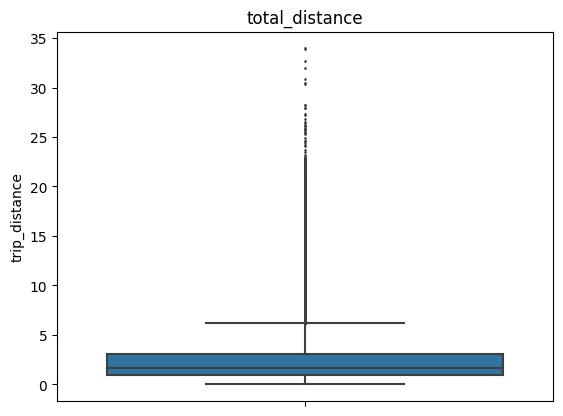

In [20]:
sns.boxplot(y=df['trip_distance'], fliersize=1)
plt.title('total_distance')
plt.show()

The highest distribution of trip distances were below 5 miles, but there were outliers all the way out to 35 miles.

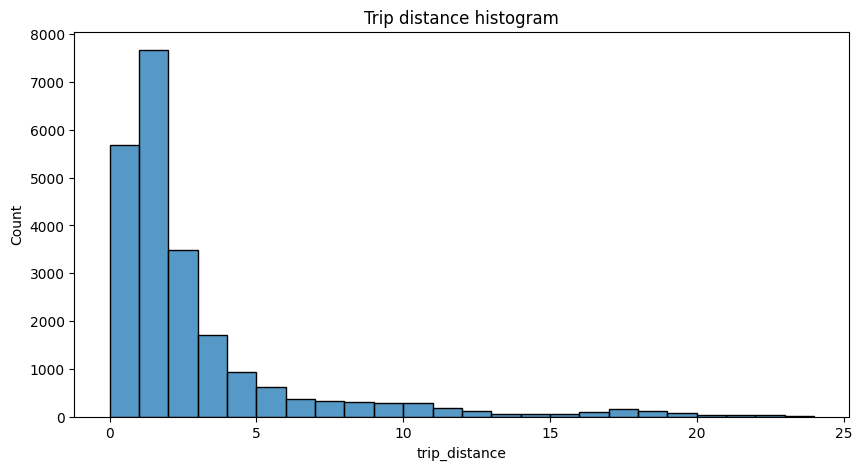

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,25,1))
plt.title('Trip distance histogram')
plt.show()

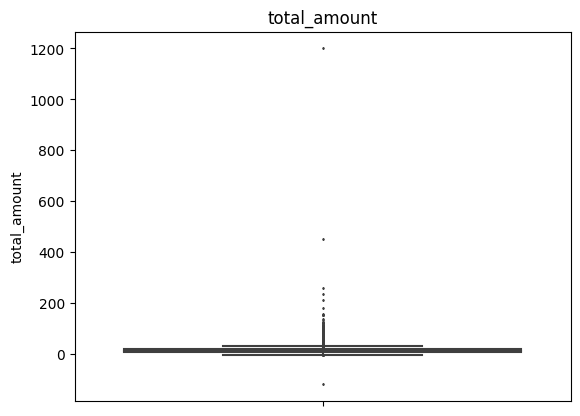

In [22]:
plt.title('total_amount')
sns.boxplot(y=df['total_amount'], fliersize=1)
plt.show()

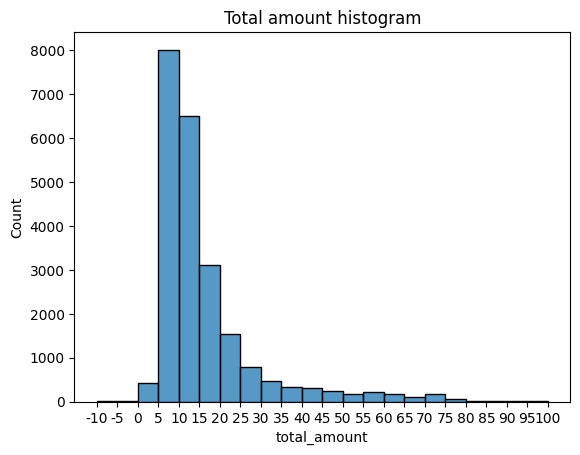

In [23]:
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram')
plt.show()

Conclusion made based on outliers:

this dataset has some outliers that need decisions to be made on prior to designing a model.


### Tip amount by Vendor

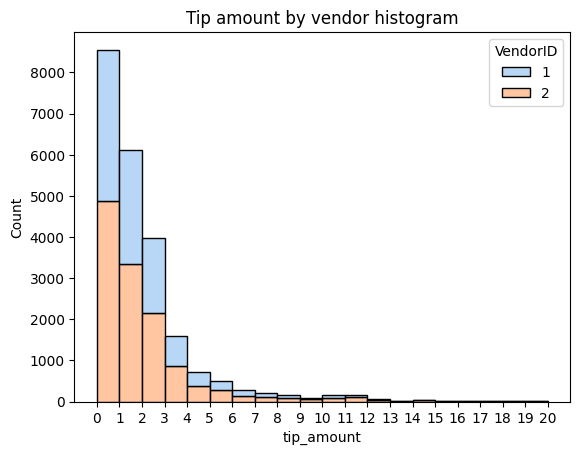

In [24]:
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram')
plt.show()

Vendor 2 (Creative Mobile Technologies, LLC) appears to have recorded more tips compared to vendor 1 (VeriFone Inc). Check more on this by investigating tips mote than $10

### Tip amount over 10 by Vendor

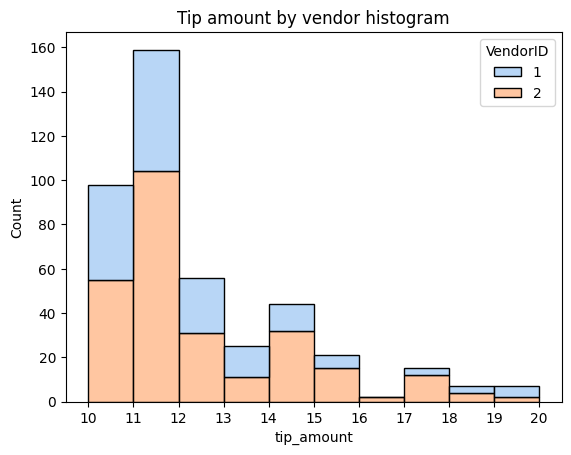

In [25]:
tips_over_ten = df[df['tip_amount'] > 10]
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram')
plt.show()

Same for tips more than $10. `Creative Mobile Technologies, LLC` appears to have recorded more tips than `VeriFone Inc`

### Total amount vs trip distance without **0.**

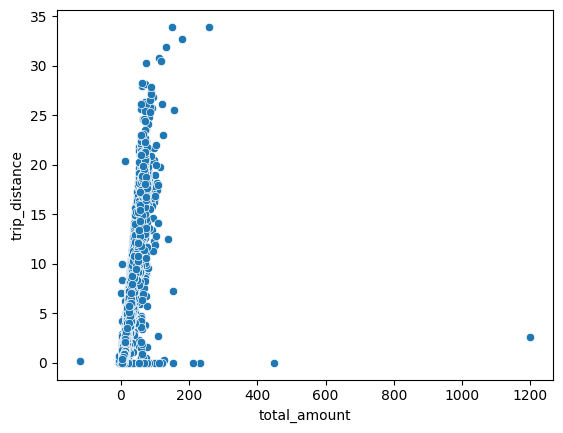

In [26]:
sns.scatterplot(x=df['total_amount'], y=df_2)
plt.show()

For most trips, the total amount is not heavily dependent on the distance traveled.

### Distribution of Tip amount based on Passenger count

In [27]:
df['passenger_count'].unique()

array([6, 1, 2, 4, 5, 3, 0], dtype=int64)

In [28]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

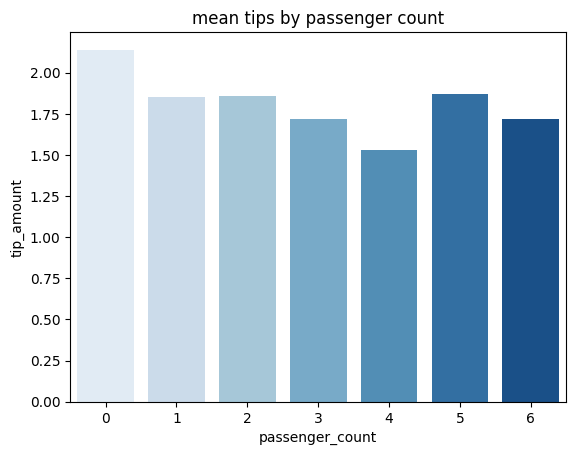

In [29]:
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']].reset_index()
mean_tips_by_passenger_count['tip_amount'] = mean_tips_by_passenger_count['tip_amount'].round(2)
sns.barplot(data=mean_tips_by_passenger_count, x='passenger_count', y= 'tip_amount', palette='Blues')
plt.title('mean tips by passenger count')
plt.show()

Rides with 5 passengers have the highest average tip amount ($1.87), followed by rides with 2 passengers ($1.86).
Rides with 0 passengers have a relatively high average tip amount ($2.14), but the sample size is small (33 rides).
Rides with 4 passengers have the lowest average tip amount ($1.53).
It's clear that the `number of passengers` has some influence on the `average tip amount`, with larger groups tending to leave slightly higher tips.

### Calculate duration time
Use the dropoff and pickup times to derive a trip duration for each data entry.

In [30]:
# Create trip_duration (the time is in minutes)
df['trip_duration'] = (df['drop_off_converted'] - df['pick_up_converted'])/np.timedelta64(1, "m")
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667


Create a scatterplot to visualize the relationship trip_duration and trip_distance.

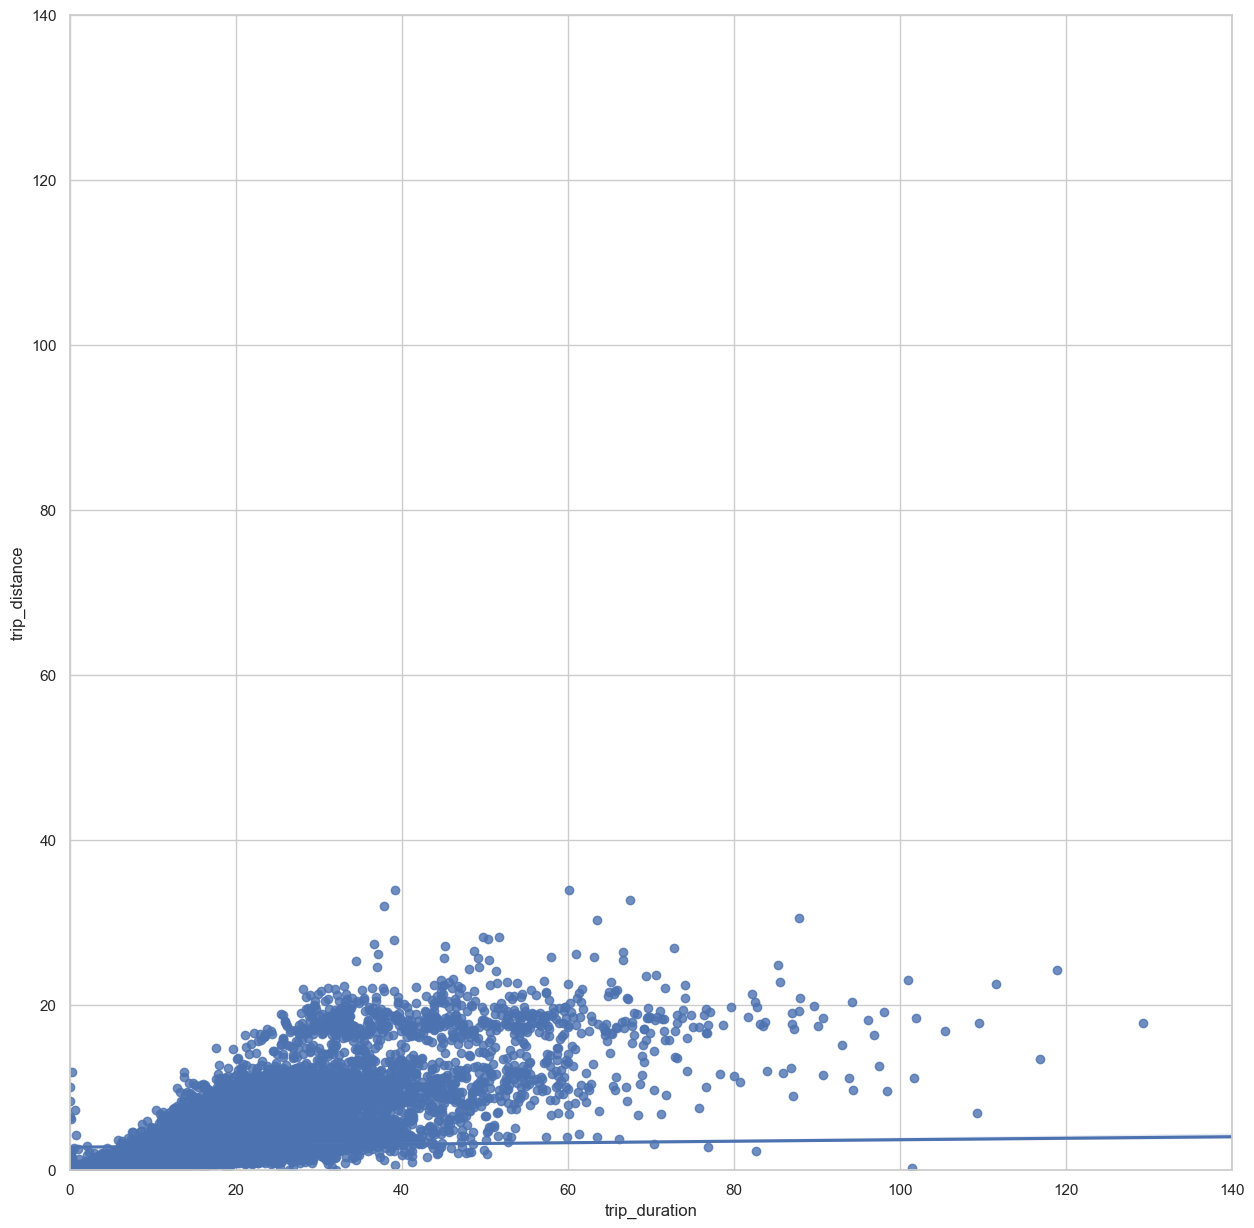

In [31]:
# Create a scatter plot of trip_duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x=df["trip_duration"], y=df["trip_distance"])
plt.ylim(0, 140)
plt.xlim(0,140)
plt.show()

Create a pairplot to visualize pairwise relationships between relevant variables
[`trip_distance`, `tip_amount`, `total_amount`, `trip_duration`]

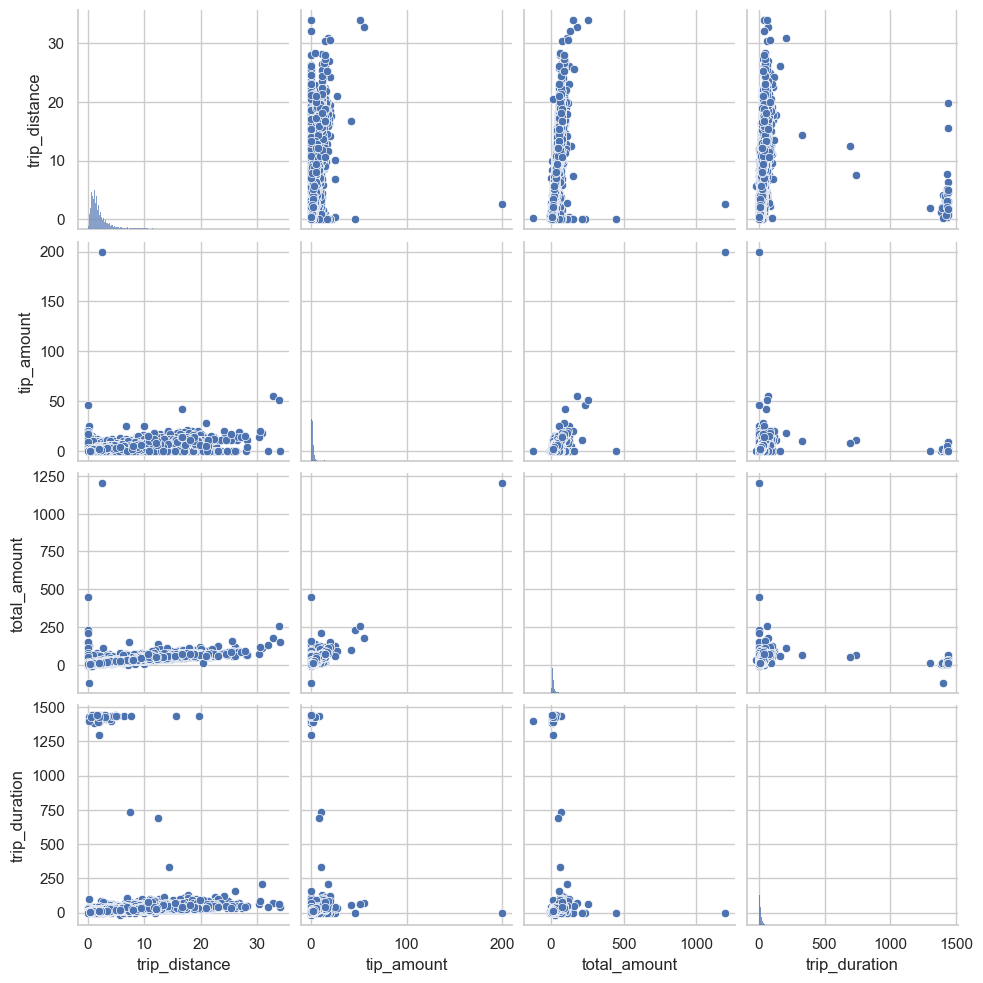

In [32]:
sns.pairplot(df[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration']])
plt.show()

Use a boxplot to visualize any outliers between the 4 variables

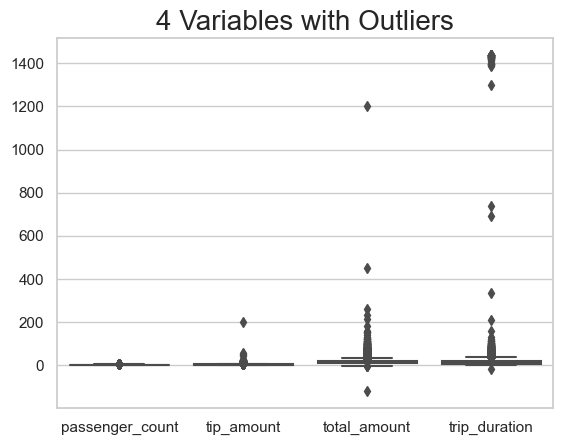

In [33]:
# Create boxplot to visualize the outliers
sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=True)
plt.title("4 Variables with Outliers",fontsize=20)
plt.show()

Use a boxplot to visualize the distribution of the data without outliers.

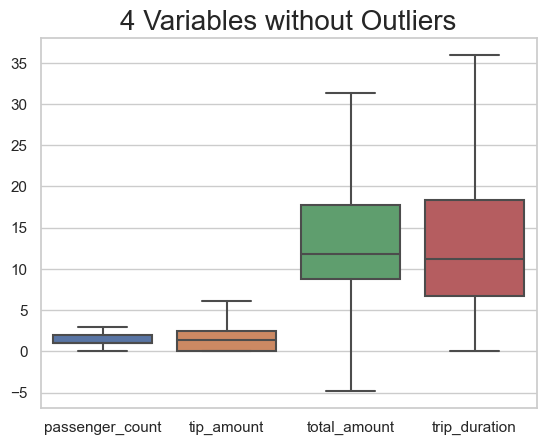

In [34]:
# Create boxplot to visualize data without outliers
sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False)
plt.title("4 Variables without Outliers",fontsize=20)
plt.show()

### Remove outliers
Remove outliers as needed; for `total_amount` and `trip_duration`

Start by removing outliers in `trip_duration`.

In [35]:
# Compute the 25th and 75th percentile values in `trip_duration`
percentile25 = df["trip_duration"].quantile(0.25)
percentile75 = df["trip_duration"].quantile(0.75)

# Compute the interquartile range for `trip_duration`
iqr = percentile75 - percentile25

# Compute the 25th and 75th percentile values in `trip_duration`
percentile25 = df["trip_duration"].quantile(0.25)
percentile75 = df["trip_duration"].quantile(0.75)

# Compute the interquartile range for `trip_duration`
iqr = percentile75 - percentile25

# Compute the upper limit for `trip_duration`
upper_limit = percentile75 + 1.5 * iqr

# Remove outliers in `trip_duration`:
# Set values greater than the upper limit to the upper limit
# Set values less than 0 to 0
df[df['trip_duration'] > upper_limit.__round__(0)] = upper_limit.__round__(0)
df[df['trip_duration'] < 0] = 0


# Display descriptive stats after removing outliers in `trip_duration`
df["trip_duration"].describe()

count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

Remove outliers in `total_amount`.

In [36]:
# Compute the 25th and 75th percentile values in `trip_duration`
percentile25 = df["total_amount"].quantile(0.25)
percentile75 = df["total_amount"].quantile(0.75)

# Compute the interquartile range for `trip_duration`
iqr = percentile75 - percentile25

# Compute the 25th and 75th percentile values in `trip_duration`
percentile25 = df["total_amount"].quantile(0.25)
percentile75 = df["total_amount"].quantile(0.75)

# Compute the interquartile range for `trip_duration`
iqr = percentile75 - percentile25

# Compute the upper limit for `trip_duration`
upper_limit = percentile75 + 1.5 * iqr

# Remove outliers in `trip_duration`:
# Set values greater than the upper limit to the upper limit
# Set values less than 0 to 0
df[df['total_amount'] > upper_limit.__round__(0)] = upper_limit.__round__(0)
df[df['total_amount'] < 0] = 0


# Display descriptive stats after removing outliers in `trip_duration`
df["total_amount"].describe()

count    22699.000000
mean        14.378121
std          7.762212
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         31.000000
Name: total_amount, dtype: float64

### Identify correlations

In [37]:
df.corr(method="pearson")

C:\Users\Farah\AppData\Local\Temp\ipykernel_5784\2677068142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
VendorID,1.000000,0.991487,0.986410,0.998568,-0.533695,-0.520822,0.997255,0.810266,0.997929,0.998632,0.988669,0.998257,0.998632,0.729637,0.665164
passenger_count,0.991487,1.000000,0.979082,0.990879,-0.529179,-0.515616,0.989727,0.805022,0.990205,0.990956,0.980943,0.990601,0.990956,0.724830,0.661380
trip_distance,0.986410,0.979082,1.000000,0.987496,-0.535713,-0.526818,0.986075,0.884240,0.987122,0.987637,0.985086,0.987656,0.987631,0.815667,0.739694
RatecodeID,0.998568,0.990879,0.987496,1.000000,-0.533455,-0.520679,0.998609,0.811548,0.999205,0.999907,0.989999,0.999574,0.999920,0.730859,0.665997
PULocationID,-0.533695,-0.529179,-0.535713,-0.533455,1.000000,0.351327,-0.532992,-0.460024,-0.533440,-0.533524,-0.528944,-0.533443,-0.533556,-0.418663,-0.378204
DOLocationID,-0.520822,-0.515616,-0.526818,-0.520679,0.351327,1.000000,-0.520443,-0.459887,-0.521019,-0.520644,-0.517625,-0.520879,-0.520681,-0.422317,-0.379470
payment_type,0.997255,0.989727,0.986075,0.998609,-0.532992,-0.520443,1.000000,0.809211,0.997909,0.998663,0.983710,0.998327,0.998666,0.722604,0.663858
fare_amount,0.810266,0.805022,0.884240,0.811548,-0.460024,-0.459887,0.809211,1.000000,0.810991,0.811378,0.834039,0.812057,0.811385,0.979913,0.939891
extra,0.997929,0.990205,0.987122,0.999205,-0.533440,-0.521019,0.997909,0.810991,1.000000,0.999297,0.989650,0.998933,0.999297,0.732357,0.665947
mta_tax,0.998632,0.990956,0.987637,0.999907,-0.533524,-0.520644,0.998663,0.811378,0.999297,1.000000,0.990093,0.999630,0.999999,0.730698,0.666449


Visualize a correlation heatmap of the data.

C:\Users\Farah\AppData\Local\Temp\ipykernel_5784\4095198655.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")  #cmap="crest")


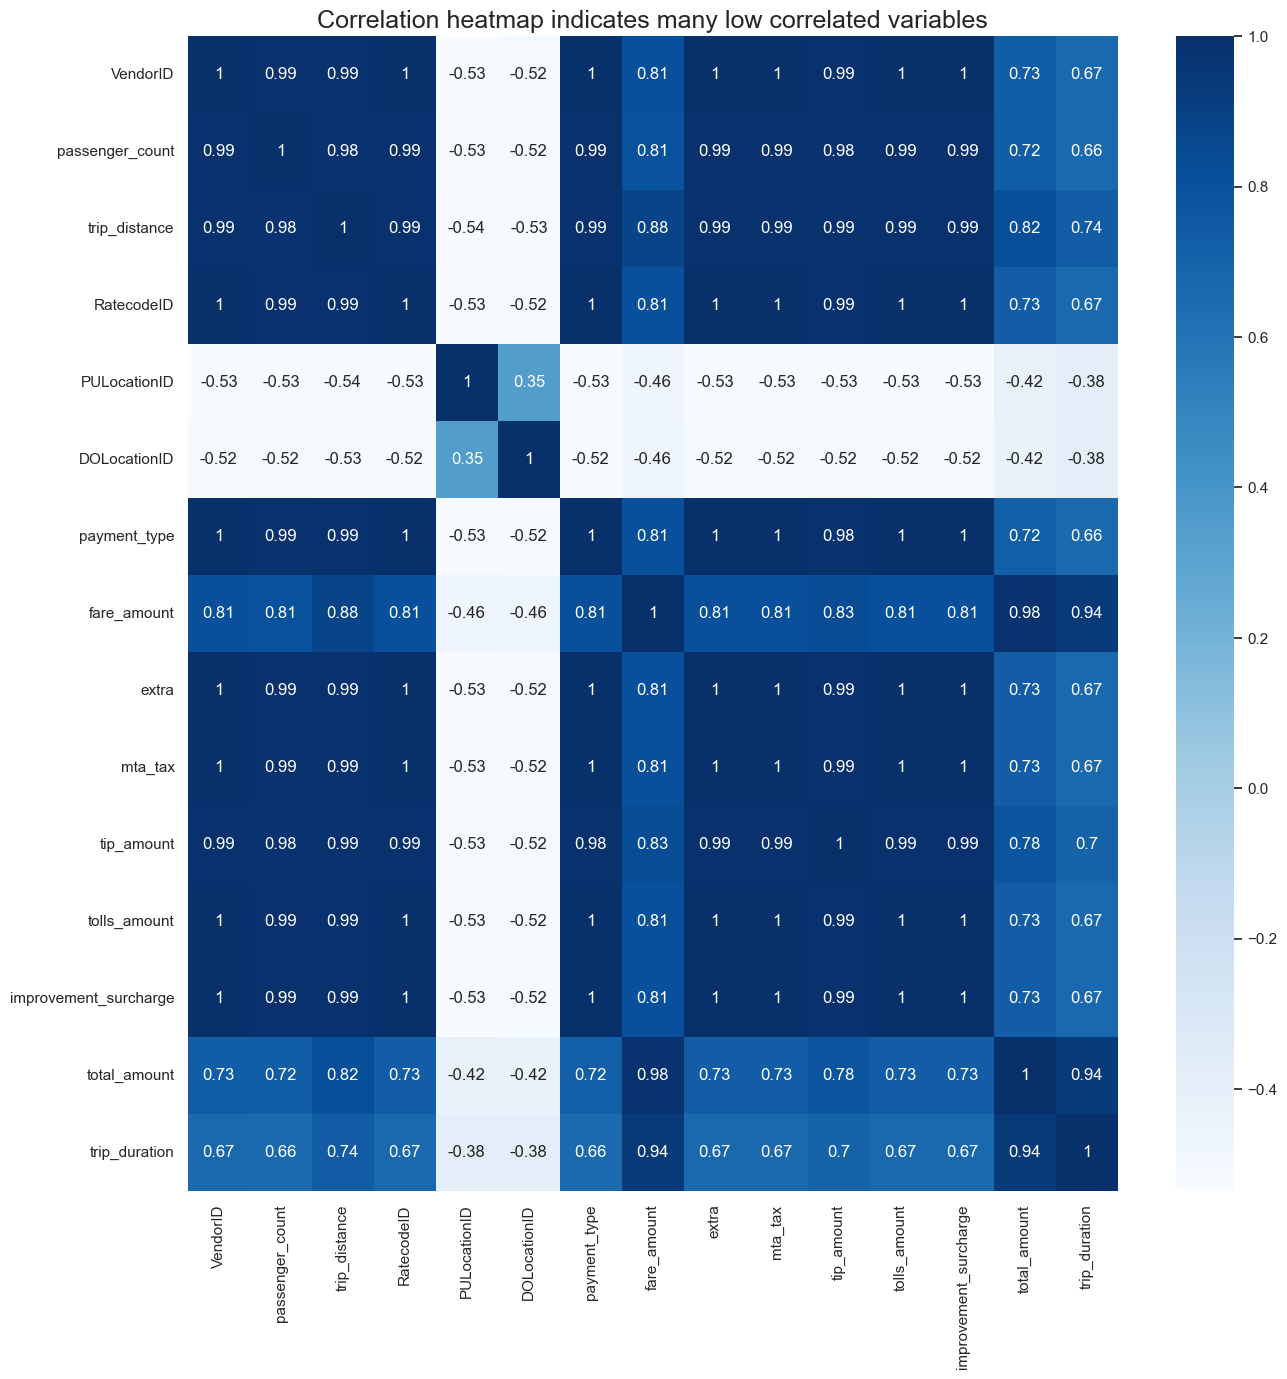

In [38]:
# Create correlation heatmap
### YOUR CODE HERE ###

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")  #cmap="crest")
plt.title("Correlation heatmap indicates many low correlated variables",
          fontsize=18)
plt.show()

This correlation matrix will be helpful in doing `feature selection` when building the regression model later in the Construct stage of the PACE framework.

### Conduct an A/B test 🗒

**The purpose** of this A/B test is to find ways to generate more revenue for taxi cab drivers. 

**Note**: For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.


**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute



In [39]:
df['payment_type'].value_counts()

1     13510
2      6679
31     2367
3        96
4        33
0        14
Name: payment_type, dtype: int64

Interested in the relationship between payment type and the total fare amount the customer pays. One approach is to look at the average total fare amount for each payment type. 

In [40]:
df.groupby(['payment_type']).mean(numeric_only = True)[['total_amount']].reset_index()

,payment_type,total_amount
0,0,0.000000
1,1,13.279181
2,2,10.829379
3,3,9.097083
4,4,11.741818
5,31,31.000000


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger total fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in total fare amount. To assess whether the difference is statistically significant, conduct a hypothesis test.

### State the null hypothesis and the alternative hypothesis

$H_0$: There is no difference in the average total fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average total fare amount between customers who use credit cards and customers who use cash.

Choose 5% as the significance level and proceed with a two-sample t-test.

In [41]:
credit_card = df[df['payment_type']==1]['total_amount']
cash = df[df['payment_type']==2]['total_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

Ttest_indResult(statistic=30.64972198792373, pvalue=8.799563254443074e-200)

Since the p-value is extremely small (much smaller than the significance level of 5%), reject the null hypothesis. Conclusion: there is a `statistically` significant `difference` in the average total fare amount between customers who use credit cards and customers who use cash.

### Communicate insights from the test
Encouraging customers to pay with `credit cards` can likely result in `increased revenue` for taxi cab drivers, however,
passengers' payment choices might be influenced by various factors such as convenience, availability of cash, or personal preferences. The assumption made for this project is that the data was randomly grouped to perform an A/B test, and it doesn't account for other potential explanations for payment choices. Additionally, the observation that cash payments have tip values of $0 while card payments have non-zero values is a significant factor that can skew the results.

----

![PACE - Construct Stage](images/pace_construct.png)

In this section 2 predictive models were built. One is to predict the `duration of a trip` and the other is to determine if a customer will **`not`** leave a tip.

- Predict duration of trip
    - Build and Evaluate the regression model
- Predict customer leaving tip
    - Build and evaluate the classification model

### Regression Model for Duration of Trip 🗒
The NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple `linear regression` model for `ride durations` based on a variety of variables. After analysis and deriving variables with close relationships, it is time to begin constructing the model.


#### Feature Selection

In [42]:
# Set y variable
y = df[["trip_duration"]]

# Remove the target column from the features
X = df.copy()
X = df.drop(columns="trip_duration")

# Display first few rows
X.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20


The pickup and dropoff location ID variables are going to be dropped in this exemplar. Including them as categorical features would involve one-hot encoding, which would add a bunch of columns to the dataset, adding model complexity and leading to overfitting.

To help with processing time, consider dropping irrelevant and redundant columns.

In [43]:
# List of columns to be dropped from X
drop_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                'store_and_fwd_flag', 'passenger_count', 'VendorID',
                'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                'drop_off_converted', 'pick_up_converted']

# Drop the columns
X = X.drop(columns=drop_columns, axis=1)
# Display first few rows
X.head()

,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1,1,0.0,0.5,2.76,0.0,0.3
1,1.80,1,1,0.0,0.5,4.00,0.0,0.3
2,1.00,1,1,0.0,0.5,1.45,0.0,0.3
3,3.70,1,1,0.0,0.5,6.39,0.0,0.3
4,4.37,1,2,0.5,0.5,0.00,0.0,0.3


#### Feature Scaling

Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [44]:
# Standardize the X variables

X = StandardScaler().fit_transform(X)
X

array([[-0.18053384, -0.3415264 , -0.37843843, ..., -0.18572295,
        -0.34240078, -0.3411716 ],
       [-0.35174327, -0.3415264 , -0.37843843, ..., -0.05015291,
        -0.34240078, -0.3411716 ],
       [-0.44068323, -0.3415264 , -0.37843843, ..., -0.32894613,
        -0.34240078, -0.3411716 ],
       ...,
       [-0.5051647 , -0.3415264 , -0.26825997, ..., -0.4874756 ,
        -0.34240078, -0.3411716 ],
       [-0.2894853 , -0.3415264 , -0.37843843, ..., -0.30161346,
        -0.34240078, -0.3411716 ],
       [-0.31839078, -0.3415264 , -0.37843843, ..., -0.23054852,
        -0.34240078, -0.3411716 ]])

#### Build the model

Create training and testing sets.

In [45]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build and fit your model to the training data.

In [46]:
# Build and fit the model to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluating The Model 🗒

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.


In [47]:
# Evaluate the model performance on the training data

r_sq = lr.score(X_train, y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(y_train, Y_pred))
print("MAE:", mean_absolute_error(y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred)))

Coefficient of determination: 0.73545441232859
R^2: 0.73545441232859
MAE: 3.2137214261130223
RMSE: 4.5807114129569655


In [48]:
# Evaluate the model performance on the testing data

r_sq_test = lr.score(X_test, y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(y_test, Y_pred_test))
print("MAE:", mean_absolute_error(y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_test)))

Coefficient of determination: 0.7319271879697655
R^2: 0.7319271879697655
MAE: 3.208828627418736
RMSE: 4.552921289473635


The model performance is similar across `both` training and test sets, suggesting that there is no bias in the model and that the model is not overfit.

#### Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.

Get the `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [49]:
results = pd.DataFrame(data={"actual": y_test["trip_duration"],
                             "predicted": Y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
9199,19.266667,11.520463,7.746204
4955,5.066667,9.785707,-4.719040
16833,18.650000,11.378105,7.271895
13244,23.200000,25.800497,-2.600497
1063,11.516667,19.961768,-8.445101


Visualize model results

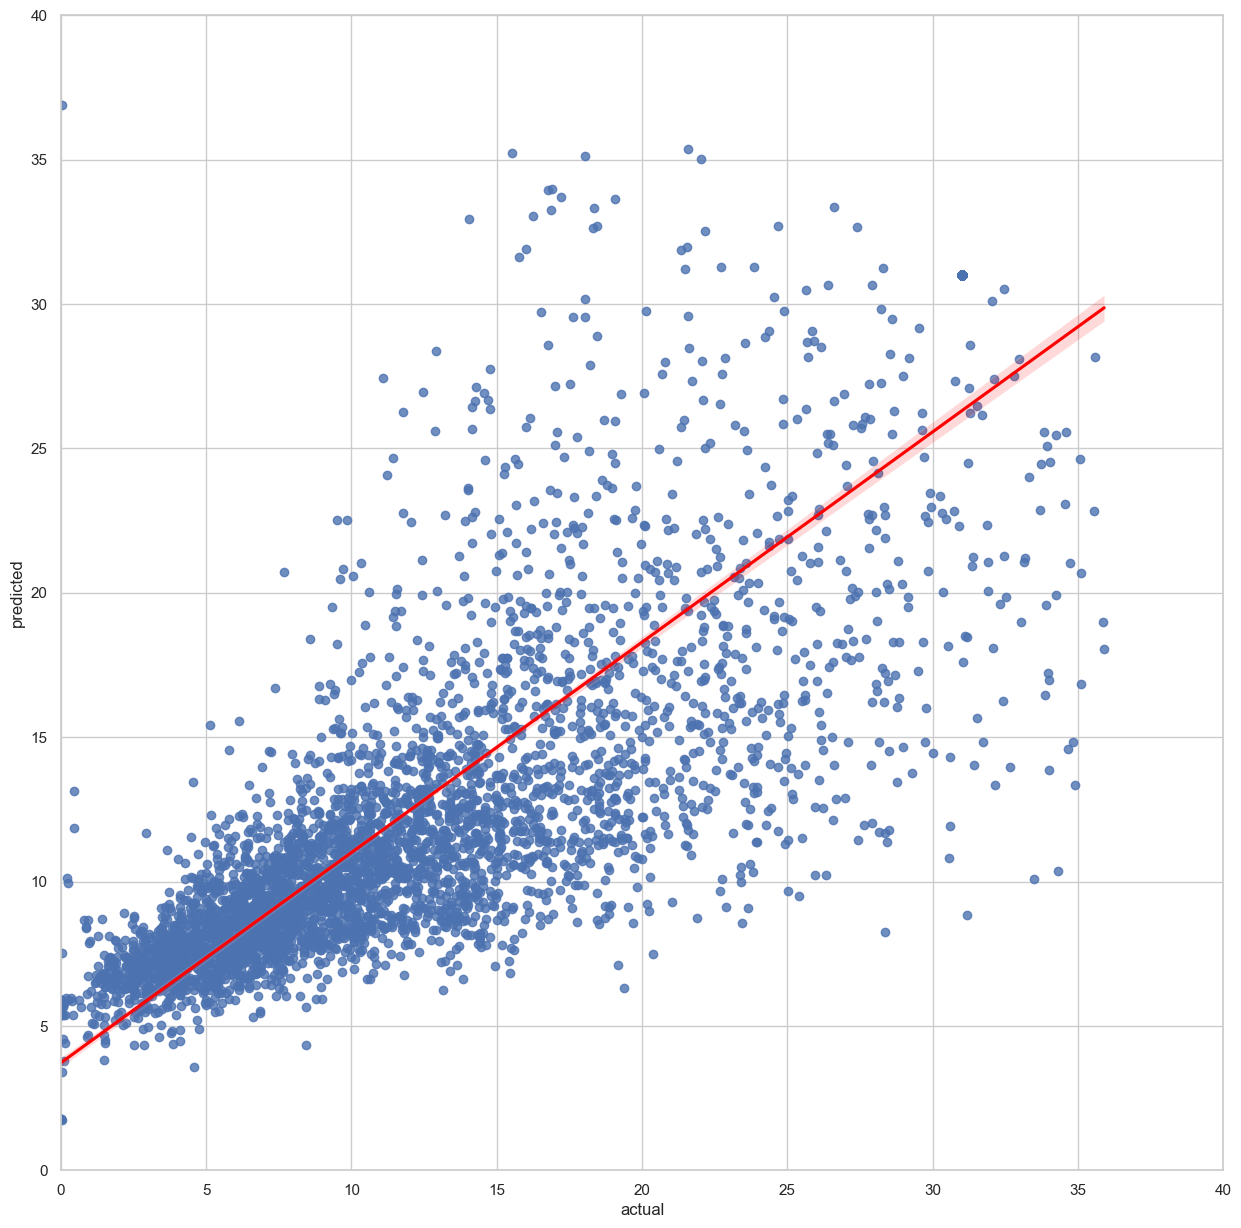

In [50]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x="actual",
           y="predicted",
           data=results, line_kws={"color": "red"})
plt.ylim(0, 40)
plt.xlim(0,40)
plt.show()

Visualize the distribution of the `residuals`.

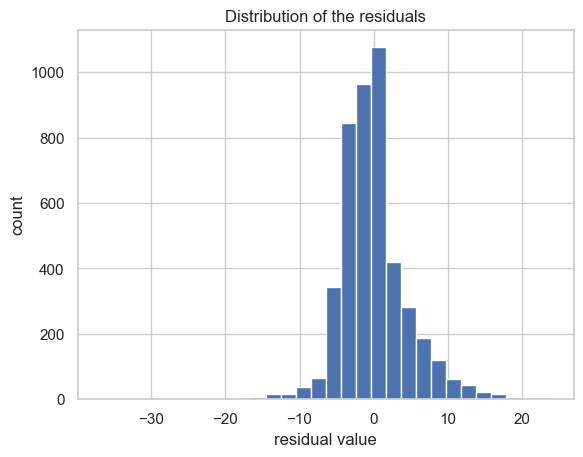

In [51]:
# Visualize the distribution of the `residuals`

plt.hist(results["residual"], bins=30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()

Create a scatterplot of `residuals` over `predicted`.

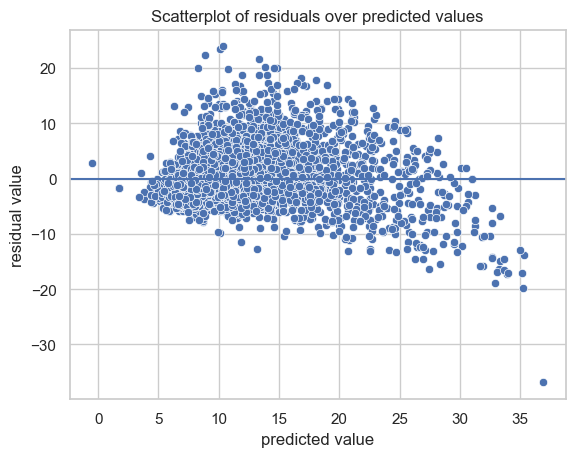

In [52]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

Data points seems to be scattered randomly across the line where residuals equal 0, hence the `homoscedasity` assumption of linear regression is not violated.

### Regression model summary

In summary, the model has an R-squared value of 0.7319, which suggests that it explains approximately `73%` of the variance in the dependent variable `trip duration`. The MAE of 3.2088 and RMSE of 4.5529 indicate that, on average, the model's predictions are reasonably close to the actual values, with some variation and larger errors for some data points. Overall, these metrics suggest that the model has `good` predictive performance, in predicting the trip duration.

----

### Classification model for Customer Tips 🗒

The New York City Taxi & Limousine Commission (New York City TLC), also requested Automatidata to build a machine learning model to predict if a customer will **`not`** leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips, and the ability to filter out people who don't tip would help increase driver revenue.

#### Significant `ethical implications` associated with the proposed model
Ethical implications include driver trust, customer access, and potential backlash. `False negatives` could `upset drivers`, while `false positives` might hinder customer access and result in `customer dissatisfaction`.

The benefits do not seem to outweigh the potential problems due to ethical concerns and access limitations so a decision not to proceed with the original request was made. Instead modifying the objective to predict the `most generous customers` (those who tip 20% or more) could help taxi drivers increase their earnings from tips without excluding certain people from using taxis


#### Feature engineering

To meet the modeling objective, the customers who pay with credit card only need to be selected from the dataset since tips were recorded for those customers only.

In [101]:
# Subset the data to isolate only customers who paid by credit card

# Read the Original
df1 = pd.read_csv('data/Yellow_Taxi_Trip_Data_2017.csv')

# Filter df1 to contain only credit card customers
df1 = df1[df1['payment_type']==1]

**`Target`**

Notice that there isn't a column that indicates tip percent, which is needed to create the target variable.

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [102]:
# Create tip % column
df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).


In [103]:
# Create 'generous' column (target)
df1['generous'] = df1['tip_percent']

# Reassign the column by converting it to Boolean (True/False)
df1['generous'] = (df1['generous'] >= 0.2)
# Reassign the column by converting Boolean to binary
df1['generous'] = df1['generous'].astype(int)


Which columns are obviously unpredictive of tip percentage? Refer to the data dictionary.

Drop `store_and_fwd_flag` column.

In [105]:
df1 = df1.drop(['store_and_fwd_flag'], axis=1)
df1.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000,1


Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to the datetime class and create a new column called `duration`, which captures the time elapsed from pickup to dropoff, then convert the duration column to `seconds`. 

In [106]:
# Convert pickup and dropoff cols to datetime
df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)

# Create ride 'duration' col
df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']

# Convert 'duration' col to seconds
df1['duration'] = df1['duration'].dt.total_seconds()


Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)

To do this, first create the four columns. For now, each new column should contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [107]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

Write functions to convert each new column to binary (0/1).

In [108]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

Apply the functions on the columns

In [109]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)

# Apply 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [110]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Since much of the information contained in the pickup and dropoff columns have been encoded  into new columns, drop them for modeling.

Also drop the columns that are constant or that contain information that would be a proxy for the target variable. For example, `total_amount` contains `tip_amount`, and therefore `tip_percent`, if used with `**fare_amount**`. And `mta_tax` is $0.50 99.6% of the time, so it's not adding any predictive signal to the model.

In [111]:
# Drop datetime cols
drop_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'payment_type', 'mta_tax', 'tip_amount', 'total_amount', 'tip_percent']
df1 = df1.drop(drop_cols, axis=1)


`RatecodeID`, `PULocationID`, `DOLocationID`: these columns are numeric, but they actually encode categorical information. To make these columns recognizable to the `get_dummies()` function as categorical variables, convert them to `type(str)`.

The `VendorID` column is also a numerical column that contains categorical information. The values are all 1 or 2.


In [112]:
# ['RatecodeID', 'PULocationID', 'DOLocationID']: converted to string
cols = ['RatecodeID', 'PULocationID', 'DOLocationID']
for col in cols:
    df1[col] = df1[col].astype(str)

# Convert ['VendorID'] to binary by subtracting 1
df1['VendorID'] = df1['VendorID'] - 1 

#### Get dummies

Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`. Don't use the `drop_first` parameter.


In [113]:
df2 = pd.get_dummies(df1)

Examine the `class balance` of the target variable. 

In [114]:
df2['generous'].value_counts()

0    9944
1    5321
Name: generous, dtype: int64

The dataset is imbalanced, but not extremely so. Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%)

### **Modeling**

### Metric to use

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, angering the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more even when the original customer would have tipped generously.

**Since your client represents taxi drivers, use a metric that evaluates false positives.** `Precision`

##### **Split the data**

Define a variable `y` that isolates the target variable (`generous`), define a variable `X` that isolates the features.
Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [115]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##### **Random forest**

Use `GridSearchCV` to tune a random forest model. The more the tuning, the better the model will fit the data, but the longer it will take.

Hyperparameters to tune: 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`

`Scoring` metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).


 **Note:** `refit` should be set to `'precision'`.


In [116]:
# Random forest classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# GridSearchCV object
rf_cv1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='precision')

Now fit the model to the training data. 

**_Note_**: _The following operation may take over an hour to complete_. Therefore, the cell has been commented out along with code cell that follows (where the model is pickled). To save time, you can skip these cells and continue to execute the cells in order.

In [ ]:
# %%time
# # Time taken to fit ==
# rf_cv1.fit(X_train, y_train)

In [119]:
# # Save the model to pickle
# with open('data/rf_cv1.pickle', 'wb') as to_write:
#     pickle.dump(rf_cv1, to_write)

In [121]:
# Read the model from the Pickled file
with open('data/rf_cv1.pickle', 'rb') as to_read:
    rf_cv1 = pickle.load(to_read)

Examine the best average score across all the validation folds. 

In [ ]:
# Examine best score
rf_cv1.best_score_

Examine the best combination of hyperparameters.

In [ ]:
rf_cv1.best_params_

Create a function to output all of the scores of your model. 